In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200507_P60

## Si II 6355

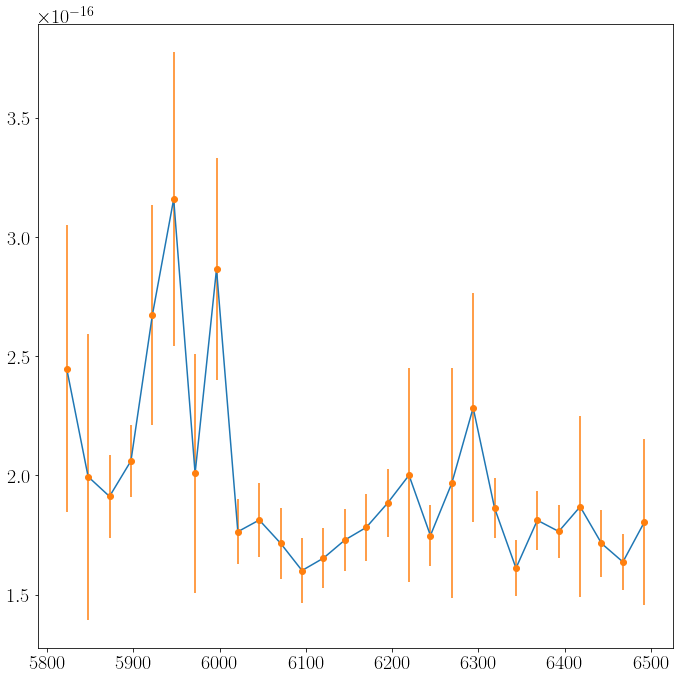

In [3]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6300, lines=[6371.359, 6347.103])

16 points within 5900.00 and 6300.00 angstroms.


In [ ]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

<AxesSubplot:>

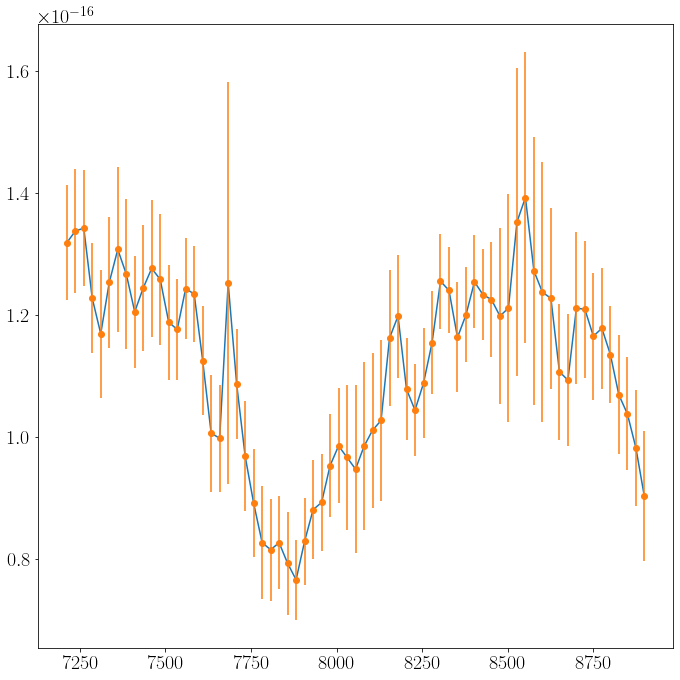

In [3]:
Spec1.plot_line_region(7200, 8900)

In [11]:
Spec1.add_line('CaII_IRT',
               7400,
               8450,
               lines=[[8498.018, 8542.089, 8662.140]],
               rel_strength=[[1, 1, 1]])

42 points within 7400.00 and 8450.00 angstroms.


## hvf

In [12]:
Spec1.line['CaII_IRT'].LS_estimator()

LS estimation:
Velocity 1: -25259 km/s


Normalize factor = 0.607


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 122.09it/s]


MCMC results:
Velocity 1: -25237 pm 390 km/s


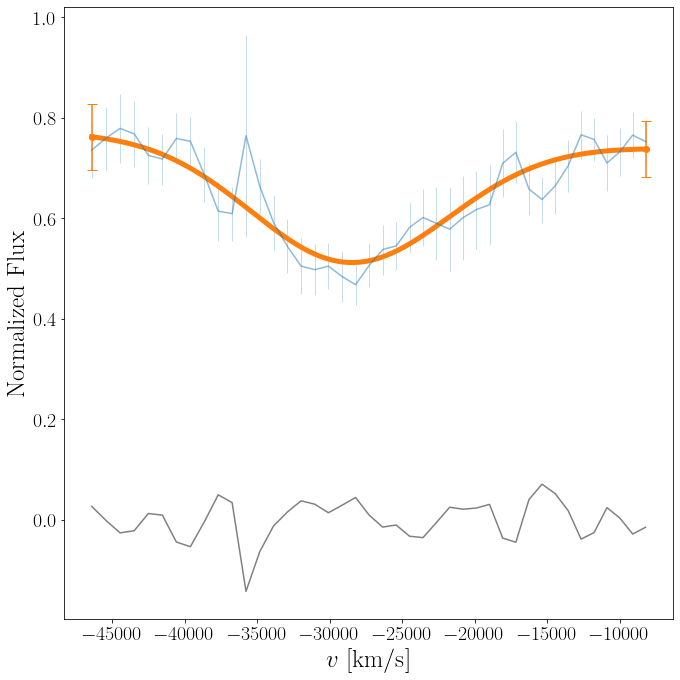

Normalize factor = 0.618


  7%|██▌                                  | 3500/50000 [00:29<06:29, 119.39it/s]


MCMC results:
Velocity 1: -25258 pm 431 km/s


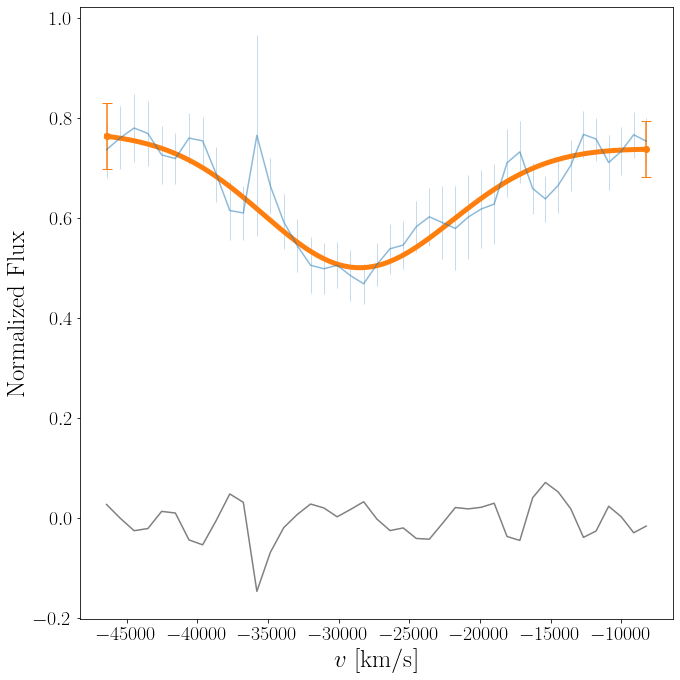

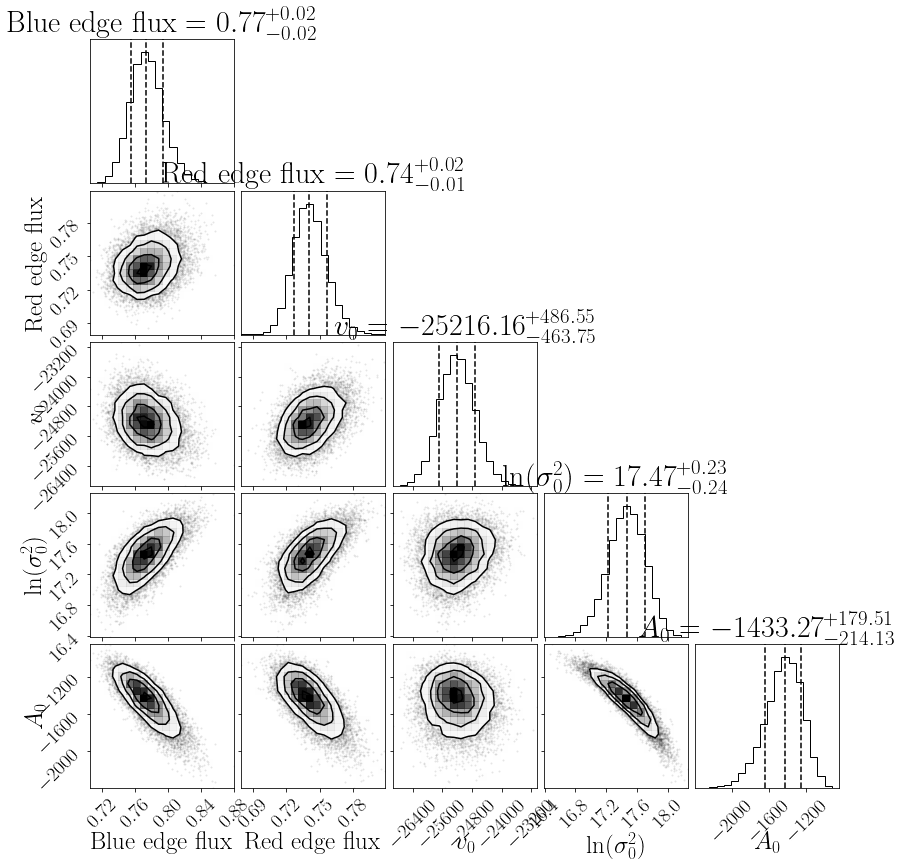

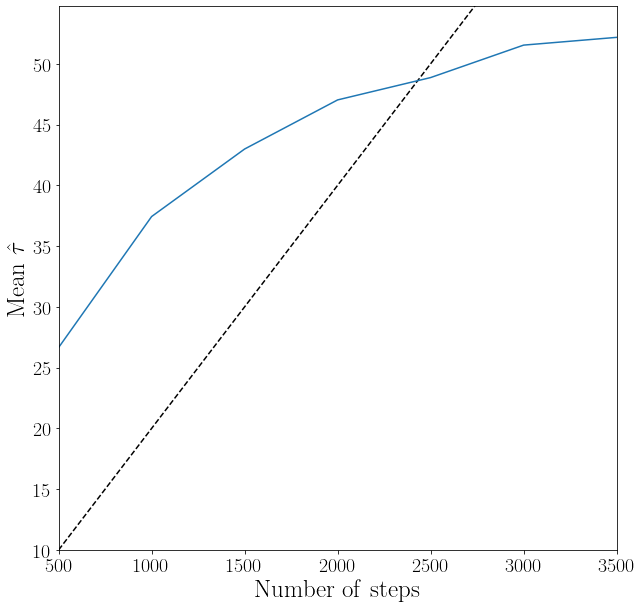

In [22]:
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    initial=[1, 1, -25000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=True)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## hvf + pvf

In [31]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7400,
               8450,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[], []])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 15, -1000,
                                                    -12000, 15, -1000))

42 points within 7400.00 and 8450.00 angstroms.
LS estimation:
Velocity 1: -26686 km/s
Velocity 2: -16492 km/s


Normalize factor = 0.549


100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 73.38it/s]


MCMC results:
Velocity 1: -25996 pm 384 km/s
Velocity 2: -15488 pm 1970 km/s
Normalize factor = 0.473


  9%|███▍                                  | 4500/50000 [01:03<10:40, 71.03it/s]

MCMC results:
Velocity 1: -25789 pm 254 km/s
Velocity 2: -15441 pm 86 km/s


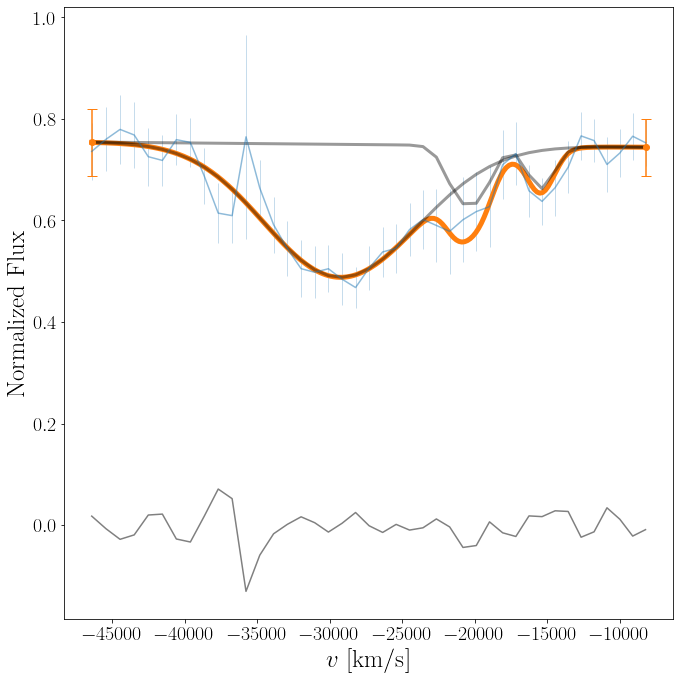

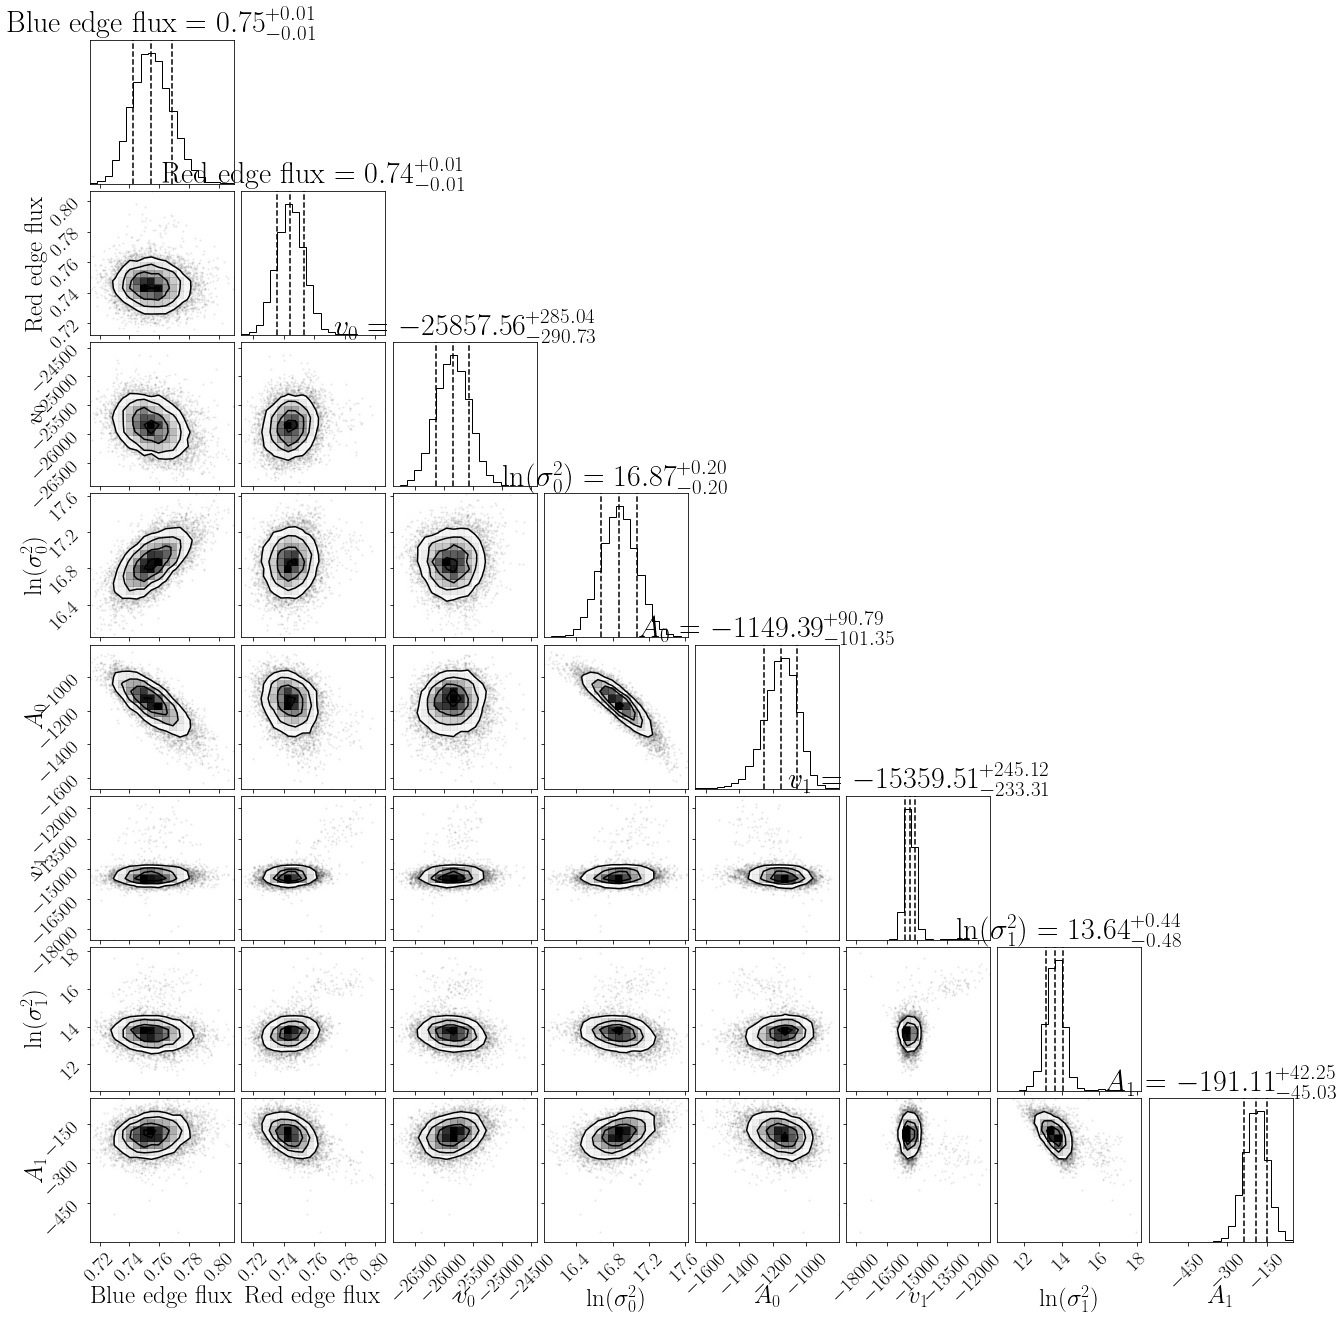

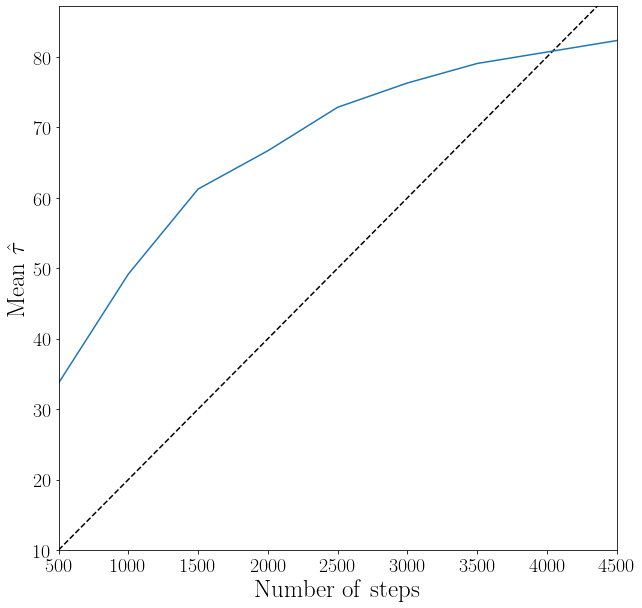

In [35]:
mu1 = -26000
mu2 = -12000
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=[1, 1, -25000, 15, -1000, -12000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['CaII_IRT/CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)